In [58]:
#necaessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [59]:
url='https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv'
data=pd.read_csv(url)
data.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


we can load the dataset from that link



In [60]:
#describe the data(i.e quantiles of each column and values of that)
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


it shows the min, max and middle quantiles of the column mean and standard deviation of each column or is there any missing value

In [61]:
data.shape

(4177, 9)

it shows the no. of rows and columns the dataset have there are 4177 rows 9 columns in dataset

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


it concludes whats type of data the dataset contains and the null values also

In [12]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

it gives us the number of null values each column have(if not any else 0 if doesn't have any null values

In [13]:
data['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

there are three unique values in sex columns in dataset

In [14]:
data['Sex']=data['Sex'].astype('category')

we have converted the object datatype into category to apply label encoder because label encoder couldn't apply on onject datatype

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             4177 non-null   category
 1   Length          4177 non-null   float64 
 2   Diameter        4177 non-null   float64 
 3   Height          4177 non-null   float64 
 4   Whole weight    4177 non-null   float64 
 5   Shucked weight  4177 non-null   float64 
 6   Viscera weight  4177 non-null   float64 
 7   Shell weight    4177 non-null   float64 
 8   Rings           4177 non-null   int64   
dtypes: category(1), float64(7), int64(1)
memory usage: 265.4 KB


In [16]:
data_dummies=pd.get_dummies(data['Sex'])
data_dummies.head() 

,F,I,M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


we have cfeated the dummies columns for sex and divide the unique vlues of it into different columns


In [17]:
data_dummies.shape

(4177, 3)

three more columns increses because of dummies column 

In [18]:
data=data.join(data_dummies)

In [19]:
data.shape

(4177, 12)

In [20]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


we have create dummies and separated the sex column in male female and infant

# Deleting the column from dataset

In [21]:
data=data.drop(columns=['Sex'])
data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


we have deleted the sex column from dataset because we have already created dummies of that column so we don't need extra column

# Visulaization

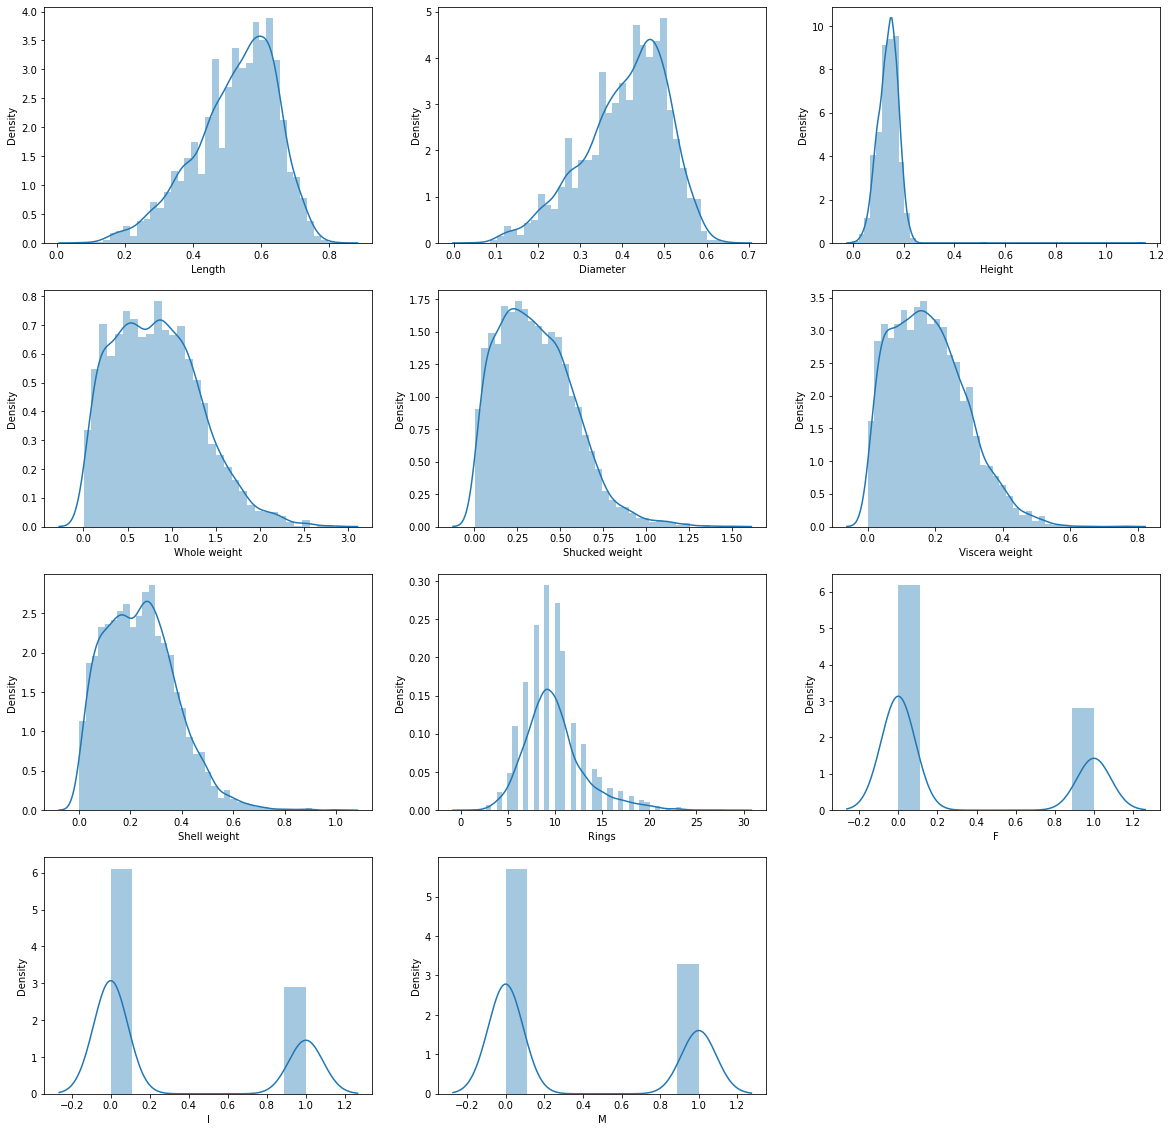

In [22]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in data:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

all the graph are very near to normal distribution not sex because we have converted it into 0,1,2 so its obvious for it else every other graph is near to normal distribution but still we check for outliers

In [23]:
data.skew()#it check how much data is skewed and on which side

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
F                 0.807302
I                 0.765708
M                 0.557390
dtype: float64

In [24]:
from scipy.stats import zscore

In [25]:
z=np.abs(zscore(data))
z.shape

(4177, 11)

In [26]:
filtering_entry=((z<3).all(axis=1))
data=data[filtering_entry]
data.shape

(4027, 11)

we used z score to detect the outliers and delete from our data

and we have deleted 150 rows from the existing dataset becaise all the rows are outliers

In [27]:
data.skew()

Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
F                 0.821149
I                 0.731618
M                 0.576507
dtype: float64

now there less or near to no outliers after appling z score to detect outliers and deal with it

Again Visualizing Again we are checking the normal detribution after deleting outliers to check the normal distribution graph wheather its normal distributed for each column or not

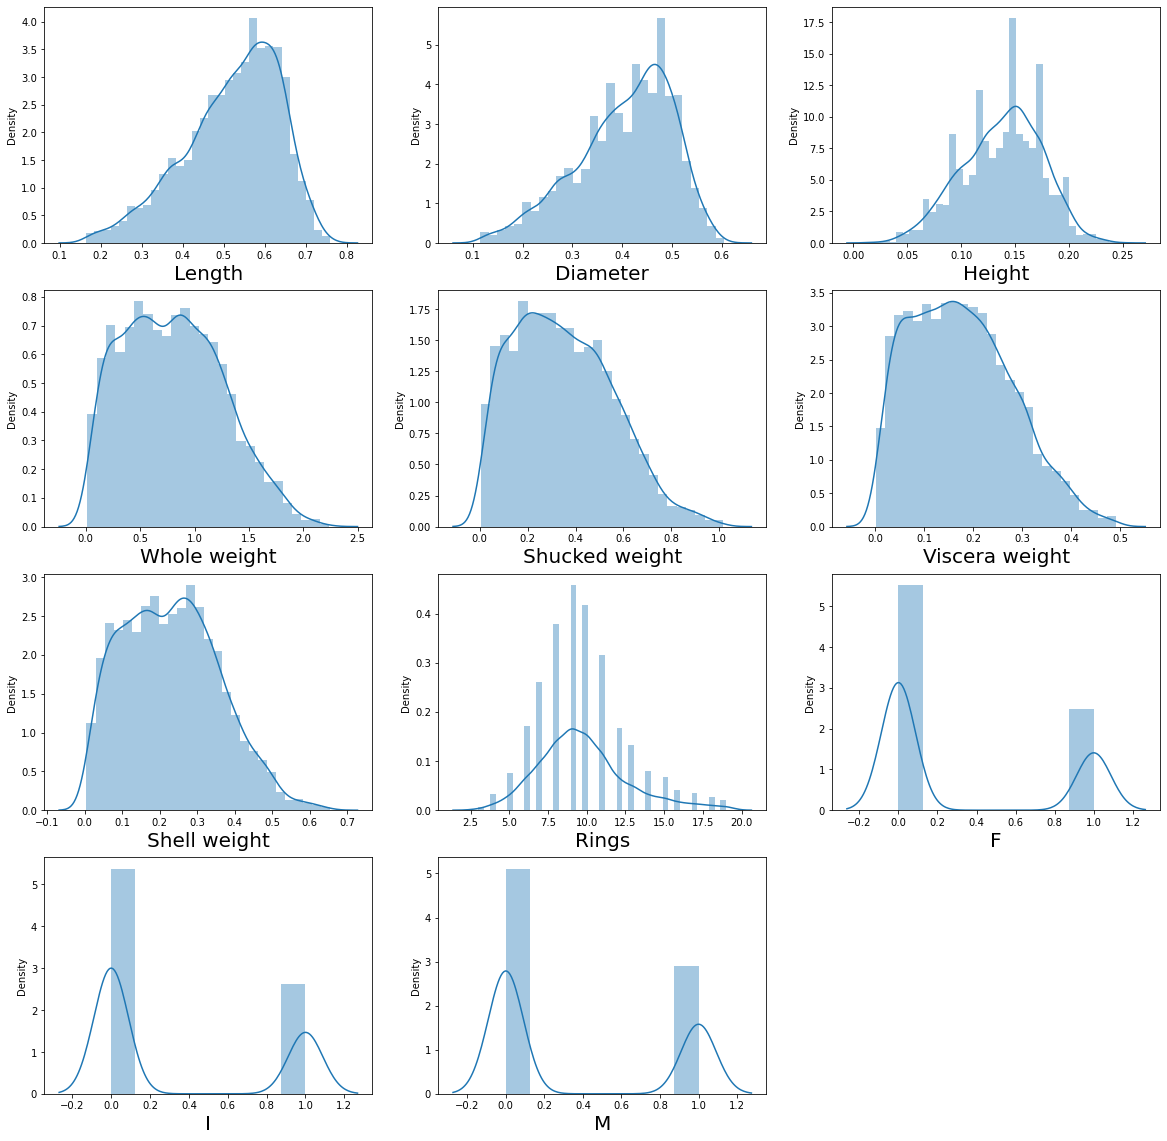

In [28]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in data:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

now its bit similar to normal ditribution and we can do further task on this data

In [29]:
x=data.drop(columns=['Rings'])
y=data['Rings']

Seperated the features and target variables in x and y respectively to obatin the model accuracy

# visualizing relationship blw features and target varibales

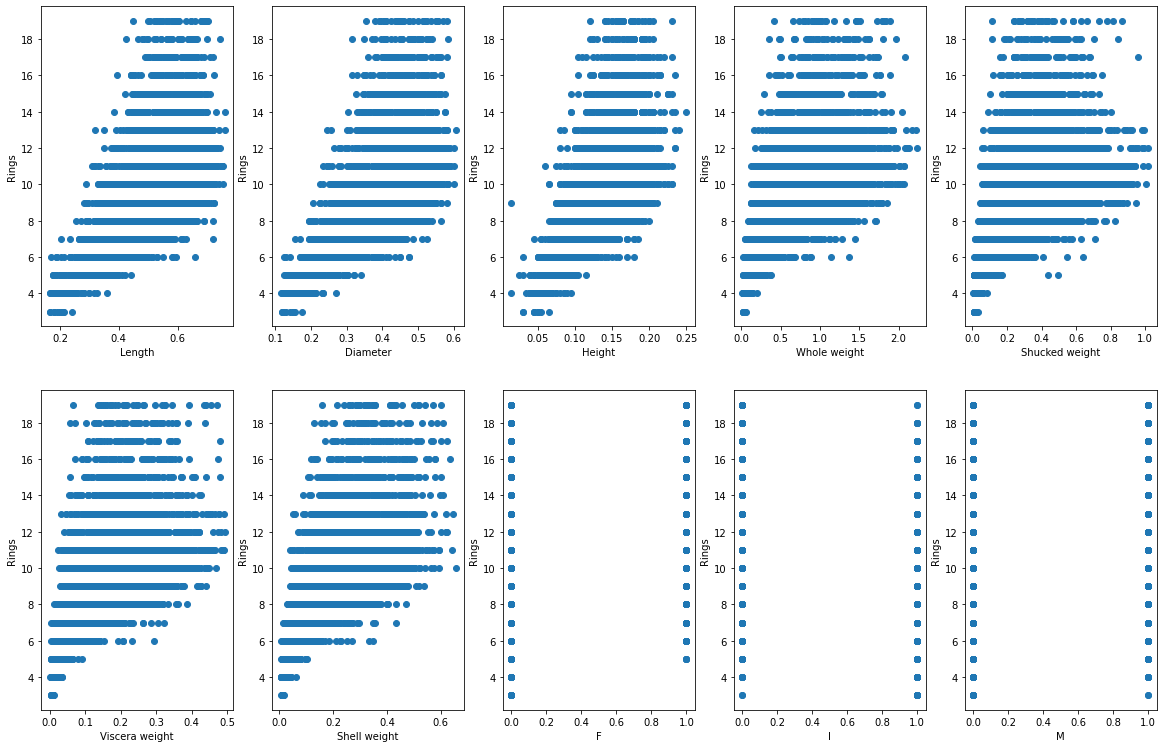

In [30]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in x:
    if plotnumber<=15:
        ax=plt.subplot(3,5,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column)
        plt.ylabel('Rings')
    plotnumber+=1
plt.show()

somehow all are related to target variables or increased when the target variable is increased so all are related to that no feature is able delete now

# checking correlation

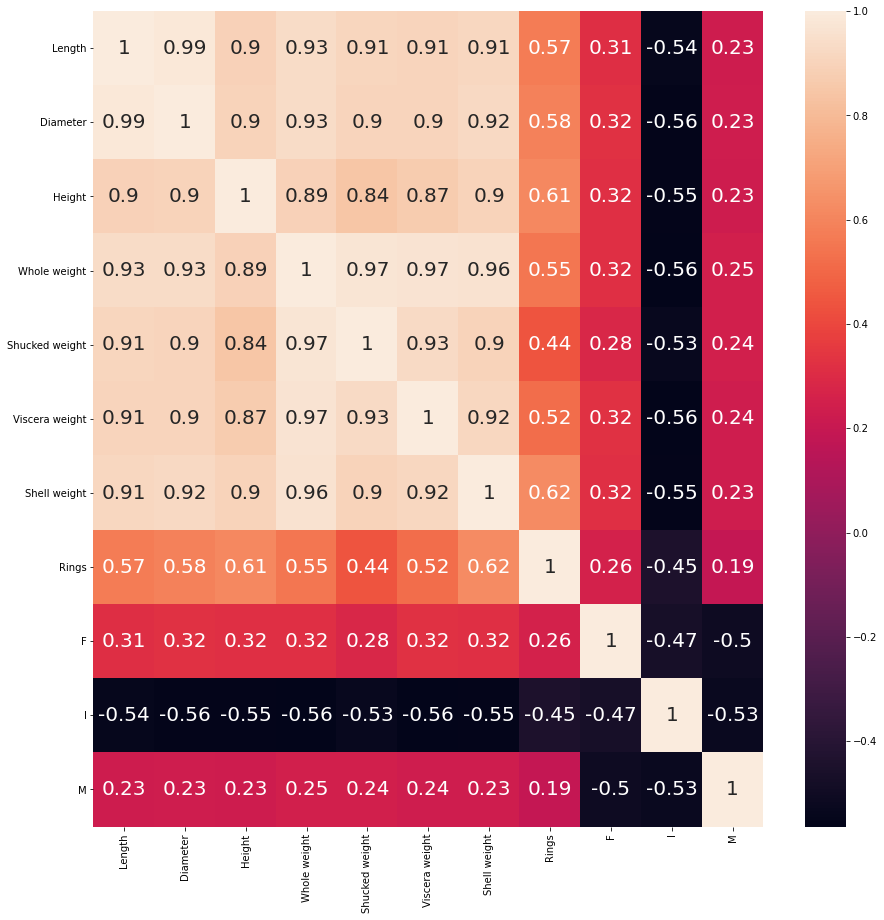

In [31]:
data_corr=data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(data_corr,annot=True,annot_kws={'size':20})
plt.show()

as its shows that its highly correlated with each other but still we cannot delete any feature beacause all feature are separatly telling some unique information about the abalone

In [32]:
#importing Standard scaler for scaling all the features ubder one dimention
from sklearn.preprocessing import StandardScaler

In [33]:
scaler=StandardScaler()
scaled_x=scaler.fit_transform(x)
scaled_x.shape[1]

10

we have scled the all the faetures contained in x fpr easy model buidling

# check for multicollinearity

In [34]:
#importing vif for checking multicollineraity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]
vif['Features']=x.columns
vif

,VIF,Features
0,39.165074,Length
1,40.852649,Diameter
2,6.591310,Height
3,108.277063,Whole weight
4,28.666881,Shucked weight
5,17.151153,Viscera weight
6,23.503036,Shell weight
7,inf,F
8,inf,I
9,inf,M


as per Variance inflation factor the features have multicollinearity ut are not deleting with the same reason that the feature are not enough in numbers so we are not deleting else deal with all of them

In [36]:
#importing traing and testing library
from sklearn.model_selection import train_test_split,GridSearchCV

In [37]:
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.25,random_state=999)

# 1st model Linear regression

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [40]:
y_pred=lin_reg.predict(x_test)
y_pred

array([ 9.07580213, 10.18051367, 10.8951672 , ...,  9.39061474,
       10.38574458,  8.70066049])

In [41]:
lin_reg.score(x_train,y_train)

0.5296545277645485

training score for linear regression column is 52%

In [62]:
lin_reg.score(x_test,y_test)

0.510655431537039

testing score for linear regression model is 51%

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

we are using model evolution that regression used 
1. mean absolute error
2. mean squared error
3. sqaure root of mean squared errir

In [44]:
mean_absolute_error(y_test,y_pred)

1.5177663411422675

In [45]:
mean_squared_error(y_test,y_pred)

3.999977528929014

In [46]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.9999943822243635

# 2nd model Random Foresr Regressor

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rfr=RandomForestRegressor(n_estimators=100,random_state=0)
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

n_estimators means how many decision tree we want to make to calculate the accuracy for this particular model

In [49]:
y_pred=rfr.predict(x_test)
y_pred


array([ 8.72, 10.  , 10.47, ...,  8.93, 10.5 ,  9.91])

In [50]:
from sklearn import metrics

In [51]:
r_square=metrics.r2_score(y_test,y_pred)
print('R-Square Error associated with RandomForestRegtessor', r_square)

R-Square Error associated with RandomForestRegtessor 0.5297089336918168


52% accuracy for testing data in Random Forest regressor

# hyperparameter tuning for ramdom forest regressor

In [52]:
param_grid={'n_estimators':[10],
           'max_features':['auto','sqrt'],
           'max_depth':[2,4],
           'min_samples_split':[2,5],
           'min_samples_leaf':[1,2],
           'bootstrap':[True,False]
           }
print(param_grid)

{'n_estimators': [10], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


these are the parameters that we give according to us if we want to chnage we can change according to our convienece

In [53]:
rfr_grid=GridSearchCV(estimator=rfr,param_grid=param_grid,cv=3,n_jobs=4)

In [54]:
rfr_grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5], 'n_estimators': [10]})

In [55]:
rfr_grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 10}

In [56]:
rfr_grid.score(x_train,y_train)

0.5434653719713183

In [57]:
rfr_grid.score(x_test,y_test)

0.4858236894863204

the accuracy decreses after using hyperparameter tuning by 3 % so there is no use of hyperparameter tuning in this

In [64]:
import pickle

In [65]:
filename='abalone.pkl'

In [69]:
pickle.dump(rfr,open('abalone.pkl','wb'))

In [70]:
pwd

'C:\\Users\\FabHotels\\Practice Project'